In [1]:
import numpy as np
import matplotlib.pyplot as plt

from broadpy import InstrumentalBroadening
from broadpy.utils import load_example_data, load_nirspec_resolution_profile

In [2]:
# load model (R~1e5)
wave, flux = load_example_data(wave_range=(1650, 3100), jwst=True)
flux /= np.nanmedian(flux) # for plotting purposes

IB = InstrumentalBroadening(wave, flux)

FileNotFoundError: [Errno 2] No such file or directory: '/net/lem/data2/tvdpost/new_pRT3-env/lib/python3.12/site-packages/examples/data/model_teff1000K_logg4_R1e5.npy'

In [8]:
# get the resolution profile of JWST NIRSpec G235H
grating = 'G235H'
_, resolution = load_nirspec_resolution_profile(grating=grating, wave=wave)
fwhm = 2.99792458e5 / resolution # shape (N,)

In [9]:
flux_fwhm_variable = IB(fwhm=fwhm, kernel='gaussian_variable')
flux_fwhm_fixed = IB(fwhm=np.mean(fwhm), kernel='gaussian')

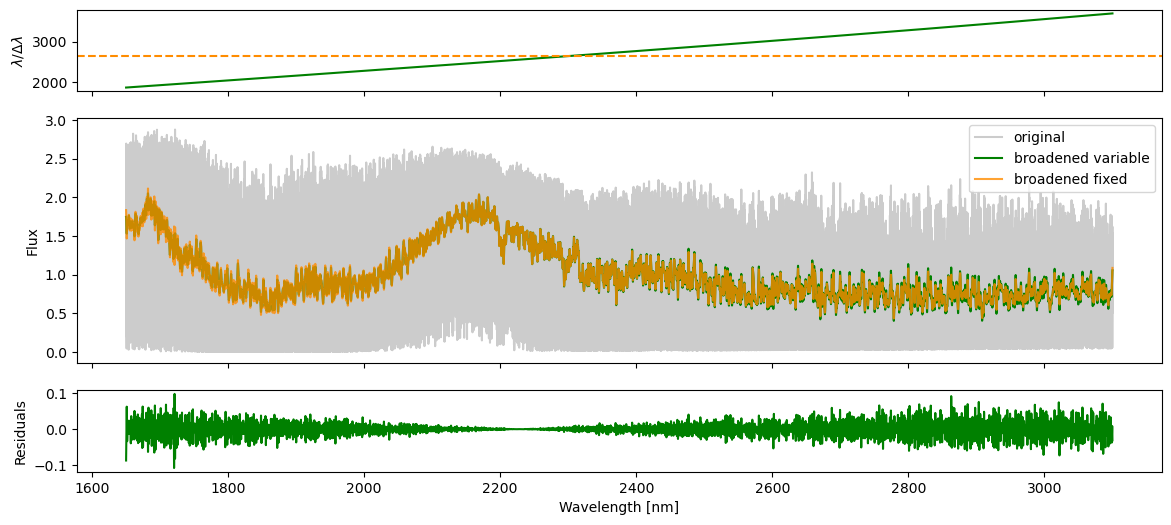

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(14, 6), sharex=True, gridspec_kw={'height_ratios': [1,3,1]})

# resolution profile
ax[0].plot(wave, resolution, color='green')
ax[0].axhline(np.mean(resolution), color='darkorange', linestyle='--')
ax[0].set(ylabel=r'$\lambda/\Delta\lambda$')
# spectra
ax[1].plot(wave, flux, label='original', color='black', alpha=0.2)
ax[1].plot(wave, flux_fwhm_variable, label='broadened variable', color='green')
ax[1].plot(wave, flux_fwhm_fixed, label='broadened fixed', color='darkorange', alpha=0.8)
# difference between variable and fixed resolution broadening
residuals = flux_fwhm_variable - flux_fwhm_fixed
ax[-1].plot(wave, residuals, color='green')

ax[1].set(ylabel='Flux')
ax[-1].set(xlabel='Wavelength [nm]', ylabel='Residuals')
ax[1].legend()
plt.show()